
# Solving Titanic dataset with Lightning Flash

* **Author:** PL team
* **License:** CC
* **Generated:** 2021-12-13T13:16:47.873671

This is a template to show how to contribute a tutorial.


---
Open in [Open In Colab{height="20px" width="117px"}](https://colab.research.google.com/github/PytorchLightning/lightning-tutorials/blob/publication/.notebooks/templates/titanic.ipynb)

Give us a ⭐ [on Github](https://www.github.com/PytorchLightning/pytorch-lightning/)
| Check out [the documentation](https://pytorch-lightning.readthedocs.io/en/latest/)
| Join us [on Slack](https://join.slack.com/t/pytorch-lightning/shared_invite/zt-pw5v393p-qRaDgEk24~EjiZNBpSQFgQ)

## Setup
This notebook requires some packages besides pytorch-lightning.

In [1]:
! pip install --quiet "pytorch-lightning>=1.3" "torchmetrics>=0.3" "torch>=1.6, <1.9" "seaborn" "ipython[notebook]" "https://github.com/PyTorchLightning/lightning-flash/archive/refs/tags/0.5.2.zip#egg=lightning-flash[tabular]" "matplotlib"
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from flash import Trainer
from flash.tabular import TabularClassificationData, TabularClassifier

## 1. Create the DataModule

### Variable & Definition

- survival: Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex
- Age: Age in years
- sibsp: number of siblings / spouses aboard the Titanic
- parch: number of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation

<AxesSubplot:>

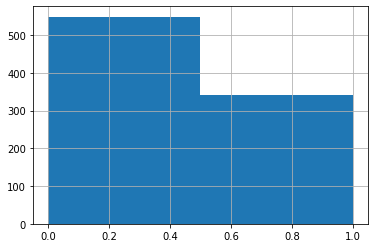

In [2]:
data_path = os.environ.get("PATH_DATASETS", "_datasets")
path_titanic = os.path.join(data_path, "titanic")
csv_train = os.path.join(path_titanic, "train.csv")
csv_test = os.path.join(path_titanic, "test.csv")

df_train = pd.read_csv(csv_train)
df_train["Survived"].hist(bins=2)

In [3]:
datamodule = TabularClassificationData.from_csv(
    categorical_fields=["Sex", "Embarked", "Cabin"],
    numerical_fields=["Fare", "Age", "Pclass", "SibSp", "Parch"],
    target_fields="Survived",
    train_file=csv_train,
    val_split=0.1,
    batch_size=8,
)

## 2. Build the task

In [4]:
model = TabularClassifier.from_data(
    datamodule,
    learning_rate=0.1,
    optimizer="Adam",
    n_a=8,
    gamma=0.3,
)

## 3. Create the trainer and train the model

In [5]:
from pytorch_lightning.loggers import CSVLogger  # noqa: E402]

logger = CSVLogger(save_dir="logs/")
trainer = Trainer(
    max_epochs=10,
    gpus=torch.cuda.device_count(),
    logger=logger,
    accumulate_grad_batches=12,
    gradient_clip_val=0.1,
)

/home/AzDevOps_azpcontainer/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:849: UserWarning: You requested multiple GPUs but did not specify a backend, e.g. `Trainer(strategy="dp"|"ddp"|"ddp2")`. Setting `strategy="ddp_spawn"` for you.
  rank_zero_warn(
GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


In [6]:

trainer.fit(model, datamodule=datamodule)

/home/AzDevOps_azpcontainer/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:90: LightningDeprecationWarning: Method `on_train_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `train_dataloader()` directly.
  rank_zero_deprecation(
/home/AzDevOps_azpcontainer/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:125: LightningDeprecationWarning: Method `on_val_dataloader` is deprecated in v1.5.0 and will be removed in v1.7.0. Please use `val_dataloader()` directly.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/2


initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 2 processes
----------------------------------------------------------------------------------------------------




  | Name          | Type       | Params
---------------------------------------------
0 | model         | TabNet     | 11.6 K
1 | train_metrics | ModuleDict | 0     
2 | val_metrics   | ModuleDict | 0     
3 | test_metrics  | ModuleDict | 0     
---------------------------------------------
11.6 K    Trainable params
0         Non-trainable params
11.6 K    Total params
0.047     Total estimated model params size (MB)
/home/AzDevOps_azpcontainer/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:104: UserWarning: strategy=ddp_spawn and num_workers=0 may result in data loading bottlenecks. Consider setting num_workers>0 and persistent_workers=True
  rank_zero_warn(


Epoch 0:  11%|█         | 6/56 [00:00<00:01, 40.78it/s, loss=1.09, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=1.250]

Epoch 0:  25%|██▌       | 14/56 [00:00<00:01, 38.92it/s, loss=1.07, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.675]

Epoch 0:  41%|████      | 23/56 [00:00<00:00, 39.82it/s, loss=0.982, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.917]

Epoch 0:  57%|█████▋    | 32/56 [00:00<00:00, 38.82it/s, loss=1.08, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.786]

Epoch 0:  71%|███████▏  | 40/56 [00:01<00:00, 38.95it/s, loss=1.1, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.985] 

Epoch 0:  84%|████████▍ | 47/56 [00:01<00:00, 39.34it/s, loss=0.877, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.270]

Epoch 0:  89%|████████▉ | 50/56 [00:01<00:00, 37.50it/s, loss=0.761, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.454]
Validating: 0it [00:00, ?it/s]
Epoch 1:   2%|▏         | 1/56 [00:00<00:01, 39.17it/s, loss=0.758, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.694, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  18%|█▊        | 10/56 [00:00<00:01, 41.31it/s, loss=0.646, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.340, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  32%|███▏      | 18/56 [00:00<00:00, 39.38it/s, loss=0.636, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.509, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  45%|████▍     | 25/56 [00:00<00:00, 37.17it/s, loss=0.642, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.519, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  61%|██████    | 34/56 [00:00<00:00, 38.27it/s, loss=0.675, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.426, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  73%|███████▎  | 41/56 [00:01<00:00, 37.35it/s, loss=0.624, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.625, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  86%|████████▌ | 48/56 [00:01<00:00, 36.71it/s, loss=0.615, v_num=0, train_accuracy_step=0.375, train_cross_entropy_step=0.917, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 1:  89%|████████▉ | 50/56 [00:01<00:00, 36.49it/s, loss=0.608, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.333, val_accuracy=0.733, val_cross_entropy=0.556, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]
Validating: 0it [00:00, ?it/s]
Epoch 2:   0%|          | 0/56 [00:00<?, ?it/s, loss=0.608, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.333, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.576, train_cross_entropy_epoch=0.945]

Epoch 2:  16%|█▌        | 9/56 [00:00<00:01, 38.97it/s, loss=0.514, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.286, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  30%|███       | 17/56 [00:00<00:00, 39.12it/s, loss=0.472, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.533, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  45%|████▍     | 25/56 [00:00<00:00, 39.13it/s, loss=0.559, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.762, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  61%|██████    | 34/56 [00:00<00:00, 39.76it/s, loss=0.588, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.319, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  75%|███████▌  | 42/56 [00:01<00:00, 39.42it/s, loss=0.571, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.320, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  88%|████████▊ | 49/56 [00:01<00:00, 38.63it/s, loss=0.487, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.486, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]

Epoch 2:  89%|████████▉ | 50/56 [00:01<00:00, 38.48it/s, loss=0.496, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.541, val_accuracy=0.789, val_cross_entropy=0.552, train_accuracy_epoch=0.686, train_cross_entropy_epoch=0.688]
Validating: 0it [00:00, ?it/s]
Epoch 3:   5%|▌         | 3/56 [00:00<00:01, 40.29it/s, loss=0.492, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.389, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  20%|█▉        | 11/56 [00:00<00:01, 41.09it/s, loss=0.465, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.345, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  36%|███▌      | 20/56 [00:00<00:00, 40.48it/s, loss=0.528, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.468, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  50%|█████     | 28/56 [00:00<00:00, 39.11it/s, loss=0.551, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.632, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  64%|██████▍   | 36/56 [00:00<00:00, 39.30it/s, loss=0.588, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.514, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  80%|████████  | 45/56 [00:01<00:00, 39.62it/s, loss=0.518, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.412, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]

Epoch 3:  89%|████████▉ | 50/56 [00:01<00:00, 38.38it/s, loss=0.507, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.370, val_accuracy=0.811, val_cross_entropy=0.517, train_accuracy_epoch=0.757, train_cross_entropy_epoch=0.547]
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch 4:  12%|█▎        | 7/56 [00:00<00:01, 40.89it/s, loss=0.455, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.248, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]

Epoch 4:  27%|██▋       | 15/56 [00:00<00:01, 40.15it/s, loss=0.533, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.348, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]

Epoch 4:  41%|████      | 23/56 [00:00<00:00, 40.69it/s, loss=0.51, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.244, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532] 

Epoch 4:  57%|█████▋    | 32/56 [00:00<00:00, 39.79it/s, loss=0.492, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.401, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]

Epoch 4:  71%|███████▏  | 40/56 [00:01<00:00, 39.07it/s, loss=0.522, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.626, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]

Epoch 4:  84%|████████▍ | 47/56 [00:01<00:00, 39.15it/s, loss=0.565, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.413, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]

Epoch 4:  89%|████████▉ | 50/56 [00:01<00:00, 37.88it/s, loss=0.547, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.473, val_accuracy=0.800, val_cross_entropy=0.496, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]
Validating: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 56/56 [00:01<00:00, 39.89it/s, loss=0.547, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.473, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.767, train_cross_entropy_epoch=0.532]
                                                 

Epoch 5:  14%|█▍        | 8/56 [00:00<00:01, 40.06it/s, loss=0.551, v_num=0, train_accuracy_step=0.500, train_cross_entropy_step=0.852, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  29%|██▊       | 16/56 [00:00<00:01, 39.63it/s, loss=0.492, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.340, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  41%|████      | 23/56 [00:00<00:00, 39.97it/s, loss=0.496, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.475, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  57%|█████▋    | 32/56 [00:00<00:00, 38.10it/s, loss=0.474, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.553, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  71%|███████▏  | 40/56 [00:01<00:00, 37.56it/s, loss=0.495, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.567, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  84%|████████▍ | 47/56 [00:01<00:00, 38.12it/s, loss=0.486, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.585, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 5:  89%|████████▉ | 50/56 [00:01<00:00, 36.80it/s, loss=0.509, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.462, val_accuracy=0.756, val_cross_entropy=0.489, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]
Validating: 0it [00:00, ?it/s]
Epoch 6:   0%|          | 0/56 [00:00<?, ?it/s, loss=0.509, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.462, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.770, train_cross_entropy_epoch=0.541]

Epoch 6:  16%|█▌        | 9/56 [00:00<00:01, 41.16it/s, loss=0.539, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.402, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  30%|███       | 17/56 [00:00<00:01, 38.57it/s, loss=0.587, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.638, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  43%|████▎     | 24/56 [00:00<00:00, 37.20it/s, loss=0.488, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.319, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  59%|█████▉    | 33/56 [00:00<00:00, 38.04it/s, loss=0.449, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.245, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  71%|███████▏  | 40/56 [00:01<00:00, 37.18it/s, loss=0.429, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.503, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  84%|████████▍ | 47/56 [00:01<00:00, 37.74it/s, loss=0.466, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.271, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]

Epoch 6:  89%|████████▉ | 50/56 [00:01<00:00, 36.32it/s, loss=0.457, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.295, val_accuracy=0.700, val_cross_entropy=0.528, train_accuracy_epoch=0.769, train_cross_entropy_epoch=0.513]
Validating: 0it [00:00, ?it/s]
Epoch 7:   2%|▏         | 1/56 [00:00<00:01, 39.15it/s, loss=0.496, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=1.070, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  18%|█▊        | 10/56 [00:00<00:01, 41.12it/s, loss=0.605, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.325, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  32%|███▏      | 18/56 [00:00<00:00, 39.78it/s, loss=0.607, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.380, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  46%|████▋     | 26/56 [00:00<00:00, 39.74it/s, loss=0.542, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.517, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  62%|██████▎   | 35/56 [00:00<00:00, 40.20it/s, loss=0.506, v_num=0, train_accuracy_step=0.500, train_cross_entropy_step=0.813, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  79%|███████▊  | 44/56 [00:01<00:00, 39.31it/s, loss=0.501, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.445, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]

Epoch 7:  89%|████████▉ | 50/56 [00:01<00:00, 38.58it/s, loss=0.493, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.388, val_accuracy=0.789, val_cross_entropy=0.442, train_accuracy_epoch=0.771, train_cross_entropy_epoch=0.507]
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch 8:  11%|█         | 6/56 [00:00<00:01, 41.01it/s, loss=0.497, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=1.290, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  25%|██▌       | 14/56 [00:00<00:01, 40.05it/s, loss=0.488, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.538, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  41%|████      | 23/56 [00:00<00:00, 40.63it/s, loss=0.473, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.873, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  57%|█████▋    | 32/56 [00:00<00:00, 40.17it/s, loss=0.497, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.386, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  70%|██████▉   | 39/56 [00:01<00:00, 38.82it/s, loss=0.557, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.721, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  84%|████████▍ | 47/56 [00:01<00:00, 39.25it/s, loss=0.522, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.345, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 8:  89%|████████▉ | 50/56 [00:01<00:00, 37.75it/s, loss=0.482, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.290, val_accuracy=0.789, val_cross_entropy=0.443, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]
Validating: 0it [00:00, ?it/s]
Epoch 9:   2%|▏         | 1/56 [00:00<00:01, 37.86it/s, loss=0.471, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.613, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 9:  18%|█▊        | 10/56 [00:00<00:01, 40.94it/s, loss=0.446, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.274, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 9:  32%|███▏      | 18/56 [00:00<00:00, 40.27it/s, loss=0.483, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.398, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 9:  46%|████▋     | 26/56 [00:00<00:00, 39.92it/s, loss=0.49, v_num=0, train_accuracy_step=1.000, train_cross_entropy_step=0.262, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491] 

Epoch 9:  62%|██████▎   | 35/56 [00:00<00:00, 40.33it/s, loss=0.514, v_num=0, train_accuracy_step=0.625, train_cross_entropy_step=0.781, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 9:  79%|███████▊  | 44/56 [00:01<00:00, 39.84it/s, loss=0.452, v_num=0, train_accuracy_step=0.750, train_cross_entropy_step=0.561, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]

Epoch 9:  89%|████████▉ | 50/56 [00:01<00:00, 38.97it/s, loss=0.484, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.247, val_accuracy=0.822, val_cross_entropy=0.426, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch 9: 100%|██████████| 56/56 [00:01<00:00, 40.02it/s, loss=0.484, v_num=0, train_accuracy_step=0.875, train_cross_entropy_step=0.247, val_accuracy=0.789, val_cross_entropy=0.473, train_accuracy_epoch=0.776, train_cross_entropy_epoch=0.491]


/home/AzDevOps_azpcontainer/.local/lib/python3.9/site-packages/pytorch_lightning/plugins/training_type/ddp_spawn.py:307: UserWarning: cleaning up ddp environment...
  rank_zero_warn("cleaning up ddp environment...")


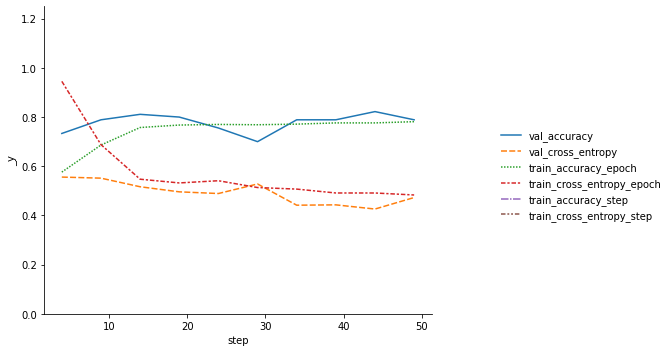

In [7]:

metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
metrics.set_index("step", inplace=True)
del metrics["epoch"]
sns.relplot(data=metrics, kind="line")
plt.gca().set_ylim([0, 1.25])
plt.gcf().set_size_inches(10, 5)

## 4. Generate predictions from a CSV

In [8]:
df_test = pd.read_csv(csv_test)

predictions = model.predict(csv_test)
print(predictions[0])

[0.8911234736442566, 0.10887651145458221]


<AxesSubplot:>

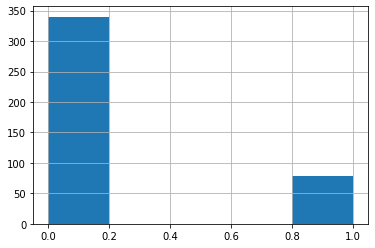

In [9]:
import numpy as np  # noqa: E402]

assert len(df_test) == len(predictions)

df_test["Survived"] = np.argmax(predictions, axis=-1)
df_test.set_index("PassengerId", inplace=True)
df_test["Survived"].hist(bins=5)

## Congratulations - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the Lightning
movement, you can do so in the following ways!

### Star [Lightning](https://github.com/PyTorchLightning/pytorch-lightning) on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool
tools we're building.

### Join our [Slack](https://join.slack.com/t/pytorch-lightning/shared_invite/zt-pw5v393p-qRaDgEk24~EjiZNBpSQFgQ)!
The best way to keep up to date on the latest advancements is to join our community! Make sure to introduce yourself
and share your interests in `#general` channel


### Contributions !
The best way to contribute to our community is to become a code contributor! At any time you can go to
[Lightning](https://github.com/PyTorchLightning/pytorch-lightning) or [Bolt](https://github.com/PyTorchLightning/lightning-bolts)
GitHub Issues page and filter for "good first issue".

* [Lightning good first issue](https://github.com/PyTorchLightning/pytorch-lightning/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* [Bolt good first issue](https://github.com/PyTorchLightning/lightning-bolts/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* You can also contribute your own notebooks with useful examples !

### Great thanks from the entire Pytorch Lightning Team for your interest !

[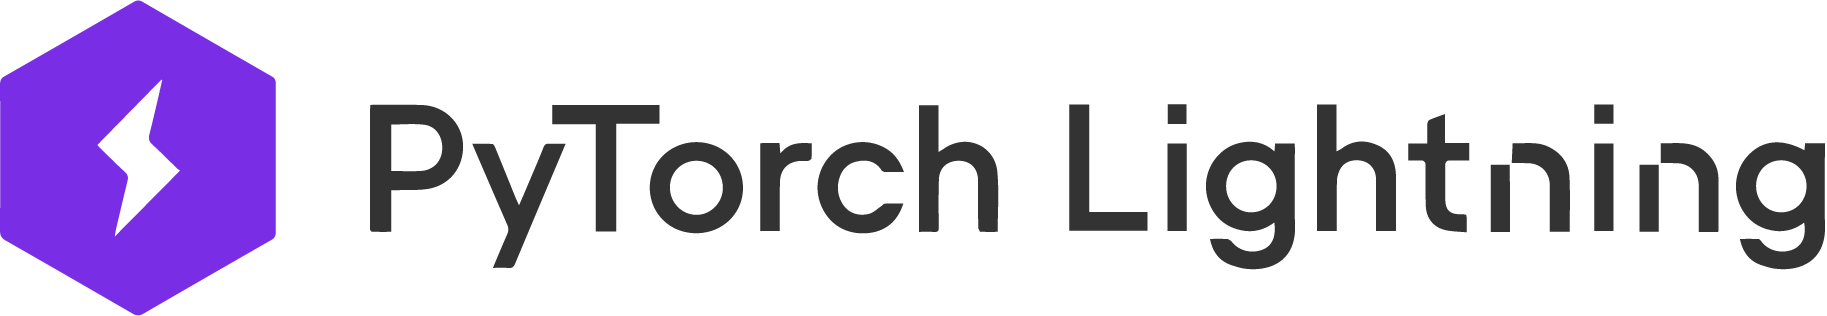{height="60px" width="240px"}](https://pytorchlightning.ai)